Importing Libraries

In [29]:
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

Data Curation

In [30]:
#Load and prepare the Fashion MNIST dataset

fashion_mnist = datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

Data Processing

In [31]:
type(train_images)

numpy.ndarray

In [32]:
type(train_labels)

numpy.ndarray

In [33]:
print(len(train_images))

60000


In [34]:
print(len(train_labels))

60000


In [35]:
print(train_images[0].shape)

(28, 28)


In [36]:
print(type(train_images[0]))

<class 'numpy.ndarray'>


In [37]:
print(train_images[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

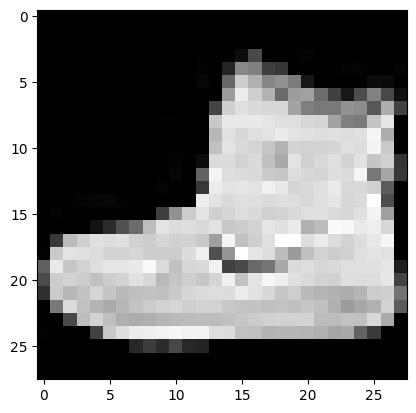

In [38]:
#Display an image from the dataset

plt.imshow(train_images[0], cmap = 'gray')
plt.show()

In [39]:
print(train_labels[0])

9


**class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']**

In [40]:
#Normalize pixel values to be between 0 and 1

train_images, test_images = train_images / 255.0, test_images /255.0

In [41]:
print(train_images[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.00392157 0.    

In [42]:
#Reshape images to specify that its a single channel (grayscale)

train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

In [43]:
train_images.shape

(60000, 28, 28, 1)

In [44]:
test_images.shape

(10000, 28, 28, 1)

**Convolutional Neural Network**

In [45]:
# Build the convolutional base
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Add Dense layers on top
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))



In [46]:
#Compile and Train the model

model.compile(optimizer = 'adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
              metrics = ['accuracy'])

Model Training

In [47]:
history = model.fit(train_images, train_labels, epochs = 5, validation_data = (test_images, test_labels))

Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 0.4898 - accuracy: 0.8226 - val_loss: 0.3709 - val_accuracy: 0.8683
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3244 - accuracy: 0.8819 - val_loss: 0.3163 - val_accuracy: 0.8876
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2775 - accuracy: 0.8988 - val_loss: 0.3071 - val_accuracy: 0.8895
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2465 - accuracy: 0.9089 - val_loss: 0.2697 - val_accuracy: 0.9032
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2255 - accuracy: 0.9163 - val_loss: 0.2780 - val_accuracy: 0.9000


Model Evaluation

In [48]:
#Evaluate the model

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose = 2)
print("Test Accuracy : " , test_acc)

313/313 - 1s - loss: 0.2780 - accuracy: 0.9000 - 604ms/epoch - 2ms/step
Test Accuracy :  0.8999999761581421


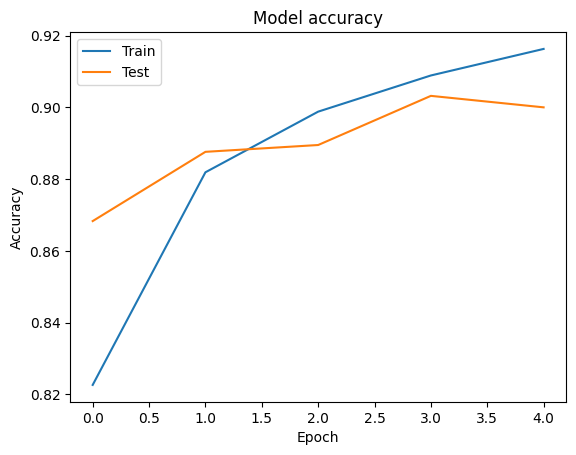

In [49]:
#Plot training & validation accuracy values

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

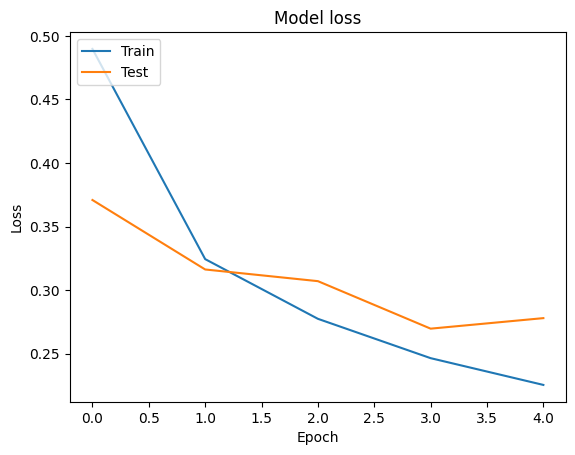

In [50]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()